## Sathwik m
## Assignment - 9 - Association Rules - book

## Prepare rules for the all the data sets 
1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values

2) Change the minimum length in apriori algorithm

3) Visulize the obtained rules using different plots 


In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
!pip install mlxtend
from mlxtend.frequent_patterns import apriori, association_rules


import warnings
warnings.filterwarnings('ignore')

In [18]:
df=pd.read_csv("book.csv")
df.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [20]:
df.describe()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.423000,0.247500,0.43100,0.282000,0.214500,0.241000,0.276000,0.113500,0.037000,0.048500,0.108500
std,0.494159,0.431668,0.49534,0.450086,0.410578,0.427797,0.447129,0.317282,0.188809,0.214874,0.311089
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
df.sum(axis=0)

ChildBks     846
YouthBks     495
CookBks      862
DoItYBks     564
RefBks       429
ArtBks       482
GeogBks      552
ItalCook     227
ItalAtlas     74
ItalArt       97
Florence     217
dtype: int64

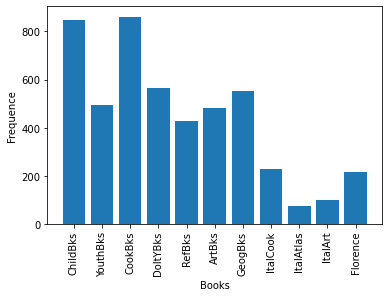

In [22]:
plt.bar(df.columns,df.sum(axis=0))
plt.xticks(rotation=90)
plt.xlabel("Books")
plt.ylabel("Frequence")
plt.show()

In [23]:
frequent_items=apriori(df,min_support=0.005,max_len=2,use_colnames=True)
frequent_items

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
61,0.0375,"(ItalArt, ItalCook)"
62,0.0175,"(Florence, ItalCook)"
63,0.0165,"(ItalAtlas, ItalArt)"
64,0.0065,"(ItalAtlas, Florence)"


In [24]:
frequent_items.sort_values('support',ascending=False,inplace=True)
frequent_items

,support,itemsets
2,0.4310,(CookBks)
0,0.4230,(ChildBks)
3,0.2820,(DoItYBks)
6,0.2760,(GeogBks)
12,0.2560,"(ChildBks, CookBks)"
...,...,...
27,0.0175,"(YouthBks, ItalAtlas)"
62,0.0175,"(Florence, ItalCook)"
63,0.0165,"(ItalAtlas, ItalArt)"
65,0.0125,"(ItalArt, Florence)"


In [25]:
rules=association_rules(frequent_items,metric="lift",min_threshold=1)
rules.sort_values('lift',ascending=False,inplace=True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
103,(ItalArt),(ItalAtlas),0.0485,0.0370,0.0165,0.340206,9.194762,0.014706,1.459547
102,(ItalAtlas),(ItalArt),0.0370,0.0485,0.0165,0.445946,9.194762,0.014706,1.717341
68,(ItalArt),(ItalCook),0.0485,0.1135,0.0375,0.773196,6.812298,0.031995,3.908659
69,(ItalCook),(ItalArt),0.1135,0.0485,0.0375,0.330396,6.812298,0.031995,1.420990
87,(ItalCook),(ItalAtlas),0.1135,0.0370,0.0230,0.202643,5.476842,0.018800,1.207740
...,...,...,...,...,...,...,...,...,...
59,(Florence),(ChildBks),0.1085,0.4230,0.0485,0.447005,1.056748,0.002605,1.043408
74,(DoItYBks),(Florence),0.2820,0.1085,0.0315,0.111702,1.029513,0.000903,1.003605
75,(Florence),(DoItYBks),0.1085,0.2820,0.0315,0.290323,1.029513,0.000903,1.011727
60,(Florence),(CookBks),0.1085,0.4310,0.0475,0.437788,1.015749,0.000737,1.012074


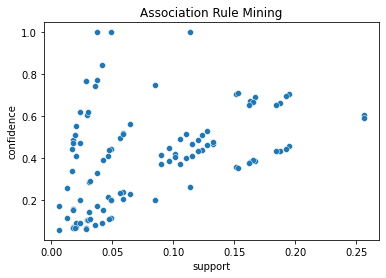

In [26]:
sns.scatterplot(x=rules['support'],y=rules['confidence'],data=rules)
plt.title("Association Rule Mining")
plt.show()

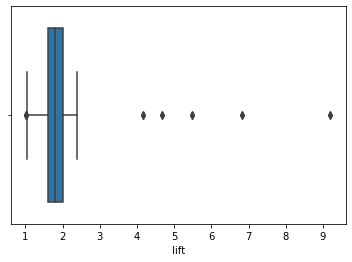

In [27]:
sns.boxplot(rules['lift'],data=rules,orient='v')
plt.show()

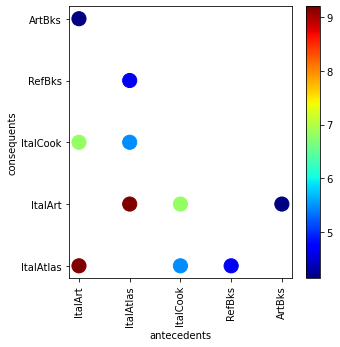

In [28]:
A1 = rules.antecedents.iloc[0:10]
B1= rules.consequents.iloc[0:10]
C1 = rules.lift.iloc[0:10]

A1 = A1.apply(lambda x: list(x)[0]).astype("unicode")
B1 = B1.apply(lambda x: list(x)[0]).astype("unicode")

fig = plt.figure(figsize=(5,5))
ax= plt.subplot(111)
sc1 = plt.scatter(A1,B1, s=200, c =C1, cmap=plt.cm.jet)
cbar= fig.colorbar(sc1,orientation='vertical')
plt.xticks(rotation=90)
plt.xlabel("antecedents")
plt.ylabel("consequents")
plt.show()

In [29]:
df_Scales= apriori(df, min_support =0.03, max_len=4,use_colnames =True)
df_Scales

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
160,0.0345,"(DoItYBks, CookBks, GeogBks, ItalCook)"
161,0.0460,"(RefBks, CookBks, GeogBks, ArtBks)"
162,0.0360,"(ItalCook, CookBks, GeogBks, ArtBks)"
163,0.0375,"(ItalCook, ItalArt, CookBks, ArtBks)"


In [30]:
df_Scales.sort_values('support',ascending=False,inplace=True)
df_Scales

,support,itemsets
2,0.431,(CookBks)
0,0.423,(ChildBks)
3,0.282,(DoItYBks)
6,0.276,(GeogBks)
12,0.256,"(ChildBks, CookBks)"
...,...,...
113,0.030,"(Florence, GeogBks, ArtBks)"
109,0.030,"(DoItYBks, ItalArt, ArtBks)"
37,0.030,"(DoItYBks, ItalArt)"
62,0.030,"(ChildBks, CookBks, ItalArt)"


In [31]:
rules1 = association_rules(df_Scales,metric='lift',min_threshold=2)
rules1.sort_values('lift',ascending=False,inplace=True)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
664,"(ArtBks, ItalCook)","(ItalArt, CookBks)",0.0565,0.0410,0.0375,0.663717,16.188215,0.035183,2.851763
665,"(ItalArt, CookBks)","(ArtBks, ItalCook)",0.0410,0.0565,0.0375,0.914634,16.188215,0.035183,11.052429
660,"(CookBks, ArtBks, ItalCook)",(ItalArt),0.0565,0.0485,0.0375,0.663717,13.684883,0.034760,2.829461
669,(ItalArt),"(CookBks, ArtBks, ItalCook)",0.0485,0.0565,0.0375,0.773196,13.684883,0.034760,4.159977
678,(ItalArt),"(ArtBks, ItalCook)",0.0485,0.0565,0.0375,0.773196,13.684883,0.034760,4.159977
...,...,...,...,...,...,...,...,...,...
137,"(ChildBks, ArtBks)",(YouthBks),0.1625,0.2475,0.0805,0.495385,2.001554,0.040281,1.491235
181,"(YouthBks, GeogBks)",(DoItYBks),0.1205,0.2820,0.0680,0.564315,2.001118,0.034019,1.647981
184,(DoItYBks),"(YouthBks, GeogBks)",0.2820,0.1205,0.0680,0.241135,2.001118,0.034019,1.158967
346,"(YouthBks, GeogBks, ArtBks)",(ChildBks),0.0650,0.4230,0.0550,0.846154,2.000364,0.027505,3.750500


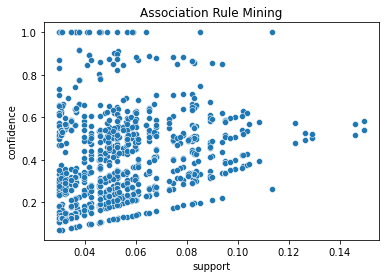

In [32]:
sns.scatterplot(x=rules1['support'],y=rules1['confidence'],data=rules1)
plt.title("Association Rule Mining")
plt.show()

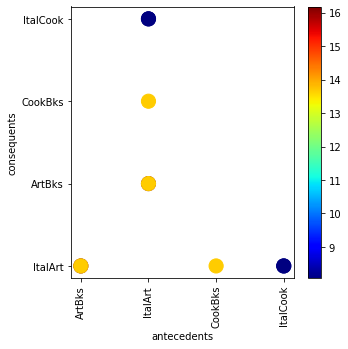

In [33]:
X1 = rules1.antecedents.iloc[0:10]
Y1 = rules1.consequents.iloc[0:10]
Z1 = rules1.lift.iloc[0:10]

X1 = X1.apply(lambda x: list(x)[0]).astype("unicode")
Y1 = Y1.apply(lambda x: list(x)[0]).astype("unicode")

fig = plt.figure(figsize=(5,5))
ax = plt.subplot(111)
sc1 = plt.scatter(X1,Y1, s = 200, c=Z1, cmap=plt.cm.jet)
cbar = fig.colorbar(sc1, orientation='vertical')    
plt.xticks(rotation=90)
plt.xlabel("antecedents")
plt.ylabel("consequents")
plt.show()

In [34]:

frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [35]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
95,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
96,"(GeogBks, ArtBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
97,(CookBks),"(GeogBks, ArtBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237
98,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800


In [36]:
rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
28,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
29,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
77,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
80,(GeogBks),"(ChildBks, ArtBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
87,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
82,"(DoItYBks, CookBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797
98,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
95,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
99,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
94,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657


In [37]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
95,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
96,"(GeogBks, ArtBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
97,(CookBks),"(GeogBks, ArtBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237
98,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800


<AxesSubplot:xlabel='support', ylabel='confidence'>

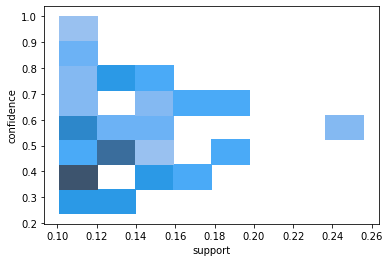

In [38]:
sns.histplot(x='support',y='confidence',data=rules)

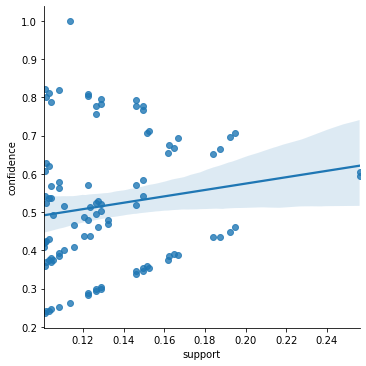

In [39]:
sns.lmplot(x='support',y='confidence',data=rules)

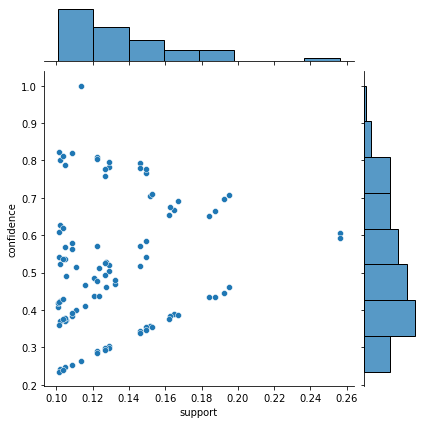

In [40]:
sns.jointplot(x='support',y='confidence',data=rules)